# Meteorological conditions during SSW events

In [1]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

## Definition of functions

In [2]:
def read_group(gruppe,loc):
    station = loc#ersten Buchstaben bitte bitte groß schreiben
    
    if loc=='Rio':
        timestart = '2008-02-01'
        timeend = '2019-12-31'
    elif loc == 'Col':
        timestart =  '2004-08-01'
        timeend =  '2019-03-06'
    elif loc=='CMA':
        timestart = '2002-01-01'
        timeend = '2018-12-31'
    infiles = f'{root_path}{station}/Meteor_radar_{station}_GW_*.h5'
    ds = xr.open_mfdataset(infiles, concat_dim = 'phony_dim_6', group = gruppe, combine='nested', parallel = True)
    ds = ds.rename({'phony_dim_6': 'time', 'phony_dim_7': 'alt'})
    ds['alt'] = alt
    ds['alt'].attrs['units'] = 'km'
    # change time range according to meteor radar station
    ds['time'] = pd.date_range(start = timestart, end = timeend, periods = ds.time.shape[0]) 
    return ds

In [3]:
def read_var(gruppe, var):
        varout = gruppe[var]
        return varout

In [4]:
def hwind(u,v):
    return np.sqrt(u**2+v**2)

In [5]:
def time_mean(step,var):
    return var.resample(time='1'+step).mean('time') #Immer nur D oder M oder H oder Y eintragen! Mit Anführungszeichen!

In [6]:
def anomalie(step,var):
    string = "time."+step   
    climatology = var.groupby(string).mean("time")
    anomalies = var.groupby(string) - climatology
    
    return anomalies

## SSW-Events

In [7]:
ssw_events = ['2008-02-21','2009-01-23','2010-01-26','2010-02-09','2010-03-24','2011-02-01','2011-03-25','2012-01-17','2013-01-06','2013-01-17','2014-03-31','2015-01-05','2016-03-16','2018-02-12']

In [8]:
alt = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, \
       106, 108, 110, 112, 114, 116, 118, 120]
root_path = '/home/gemeinsam_tmp/UA_students/data/'
#xr.open_dataset( '/home/gemeinsam_tmp/UA_students/data/CMA/Meteor_radar_CMA_wind_200810.h5', group='info')['day']

In [9]:
ds_rio = read_group('wind','Rio')
u_rio = read_var(ds_rio,'u')  
v_rio = read_var(ds_rio,'v')

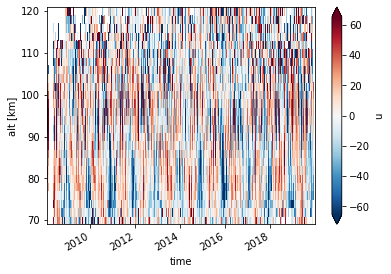

In [10]:
u_rio_anomalie = anomalie('day',u_rio)
u_rio_anomalie.plot(x='time',robust=True)

In [11]:
v_rio_anomalie = anomalie('hour',v_rio)
#v_rio_anomalie.plot(x='time',robust=True)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 31 times more chunks
  return self.array[key]


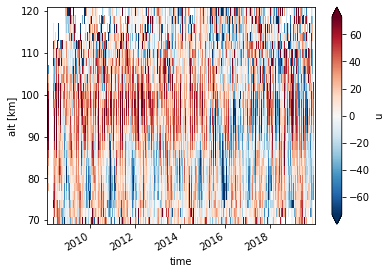

In [12]:
u_rio.plot(x='time', robust = True)

In [13]:
#v_rio.plot(x='time')

In [14]:
#u_rio.sel(time = time_sel).plot(x='time')
#u_rio.sel(time=slice('2008-05-21', '2008-06-21')).plot(x='time')

### Superposed Epoch Analysis

In [15]:
df_dates = pd.read_csv('ssw_dates_displ.csv') # you can load SSWs from a csv file like attached

xa_ls = []
max_lag=30
for il, lag in enumerate(range(-max_lag,max_lag+1)):
  dates = df_dates.set_index('BeginDate')
  dates = dates.index + pd.Timedelta(str(lag)+' days')
  print(dates)
  u_rio_anomalie_sel = u_rio_anomalie.sel(time = dates)
  comp = u_rio_anomalie_sel.groupby('time.month') - clim
  comp_m = comp.mean('time')
xa_ls.append(comp_m)
xa_comp = xr.concat(xa_ls, dim = 'lag')
xa_comp['lag'] = range(-max_lag, max_lag+1)

TypeError: unsupported operand type(s) for +: 'Timedelta' and 'str'

In [16]:
df_dates = pd.read_csv('ssw_dates_displ.csv') # you can load SSWs from a csv file like attached

xa_ls = []
max_lag=30
for il, lag in enumerate(range(-max_lag,max_lag+1)):
  dates = df_dates.set_index('BeginDate')
  dates = pd.to_datetime(dates.index) + pd.Timedelta(str(lag)+' days')
  #dates= dates.strftime("%Y-%m-%d")
  print(dates)
  u_rio_anomalie_sel = u_rio_anomalie.sel(time = dates)
  comp = u_rio_anomalie_sel.groupby('time.month') #- clim
  comp_m = comp.mean('time')
xa_ls.append(comp_m)
xa_comp = xr.concat(xa_ls, dim = 'lag')
xa_comp['lag'] = range(-max_lag, max_lag+1)

DatetimeIndex(['2008-11-24', '2009-11-27', '2009-12-11', '2010-01-23',
               '2010-12-03', '2011-01-24', '2011-11-18', '2012-11-07',
               '2012-11-18', '2014-01-30', '2014-11-06', '2016-01-16',
               '2017-12-14'],
              dtype='datetime64[ns]', name='BeginDate', freq=None)


KeyError: "not all values found in index 'time'"

In [17]:
df_dates = pd.read_csv('ssw_dates_displ.csv') # you can load SSWs from a csv file like attached

xa_ls = []
max_lag=30
for il, lag in enumerate(range(-max_lag,max_lag+1)):
  dates = df_dates.set_index('BeginDate')
  dates = dates.index + str(pd.Timedelta(str(lag)+' days'))
  print(dates)
  u_rio_anomalie_sel = u_rio_anomalie.sel(time = dates)
  comp = u_rio_anomalie_sel.groupby('time.month') #- clim
  comp_m = comp.mean('time')
xa_ls.append(comp_m)
xa_comp = xr.concat(xa_ls, dim = 'lag')
xa_comp['lag'] = range(-max_lag, max_lag+1)

Index(['2008-12-24-30 days +00:00:00', '2009-12-27-30 days +00:00:00',
       '2010-01-10-30 days +00:00:00', '2010-02-22-30 days +00:00:00',
       '2011-01-02-30 days +00:00:00', '2011-02-23-30 days +00:00:00',
       '2011-12-18-30 days +00:00:00', '2012-12-07-30 days +00:00:00',
       '2012-12-18-30 days +00:00:00', '2014-03-01-30 days +00:00:00',
       '2014-12-06-30 days +00:00:00', '2016-02-15-30 days +00:00:00',
       '2018-01-13-30 days +00:00:00'],
      dtype='object', name='BeginDate')


KeyError: "not all values found in index 'time'"

DatetimeIndex(['2009-01-23', '2010-01-26', '2010-02-09', '2010-03-24',
               '2011-02-01', '2011-03-25', '2012-01-17', '2013-01-06',
               '2013-01-17', '2014-03-31', '2015-01-05', '2016-03-16',
               '2018-02-12'],
              dtype='datetime64[ns]', name='BeginDate', freq=None)
Index(['2008-12-24', '2009-12-27', '2010-01-10', '2010-02-22', '2011-01-02',
       '2011-02-23', '2011-12-18', '2012-12-07', '2012-12-18', '2014-03-01',
       '2014-12-06', '2016-02-15', '2018-01-13'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2008-12-24T00:16:16.939500416 ... 2008-12-24T23:15:58.706329524
    day      (time) int64 24 24 24 24 24 24 24 24 24 ... 24 24 24 24 24 24 24 24
<xarray.DataArray 'u' (time: 24, 

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2012-12-08T00:37:58.146811296 ... 2012-12-08T23:37:39.913640416
    day      (time) int64 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2012-12-19T00:34:28.861719328 ... 2012-12-19T23:34:10.628548448
    day      (time) int64 19 19 19 19 19 19 19 19 19 ... 19 19 19 19 19 19 19 19
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 7

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2008-12-26T00:15:38.887665516 ... 2008-12-26T23:15:20.654494624
    day      (time) int64 26 26 26 26 26 26 26 26 26 ... 26 26 26 26 26 26 26 26
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-12-29T00:18:55.764550440 ... 2009-12-29T23:18:37.531379552
    day      (time) int64 29 29 29 29 29 29 29 29 29 ... 29 29 29 29 29 29 29 29
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 78, month: 4, alt: 26)>
dask.array<concatenate, shape=(78, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2008-12-27', '2009-12-30', '2010-01-13', '2010-02-25', '2011-01-05',
       '2011-02-26', '2011-12-21', '2012-12-10', '2012-12-21', '2014-03-04',
       '2014-12-09', '2016-02-18', '2018-01-16'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2008-12-27T00:15:19.861748064 ... 2008-12-27T23:15:01.628577172
    day      (time) int64 27 27 27 27 27 27 27 27 27 ... 27 27 27 27 27 27 27 27
<xarray.DataArray 'u

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 130, month: 4, alt: 26)>
dask.array<concatenate, shape=(130, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2008-12-28', '2009-12-31', '2010-01-14', '2010-02-26', '2011-01-06',
       '2011-02-27', '2011-12-22', '2012-12-11', '2012-12-22', '2014-03-05',
       '2014-12-10', '2016-02-19', '2018-01-17'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2008-12-28T00:15:00.835830612 ... 2008-12-28T23:14:42.602659720
    day      (time) int64 28 28 28 28 28 28 28 28 28 ... 28 28 28 28 28 28 28 28
<xarray.DataArray 

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 195, month: 4, alt: 26)>
dask.array<concatenate, shape=(195, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2008-12-29', '2010-01-01', '2010-01-15', '2010-02-27', '2011-01-07',
       '2011-02-28', '2011-12-23', '2012-12-12', '2012-12-23', '2014-03-06',
       '2014-12-11', '2016-02-20', '2018-01-18'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2008-12-29T00:14:41.809913160 ... 2008-12-29T23:14:23.576742272
    day      (time) int64 29 29 29 29 29 29 29 29 29 ... 29 29 29 29 29 29 29 29
<xarray.DataArray 

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 273, month: 4, alt: 26)>
dask.array<concatenate, shape=(273, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2008-12-30', '2010-01-02', '2010-01-16', '2010-02-28', '2011-01-08',
       '2011-03-01', '2011-12-24', '2012-12-13', '2012-12-24', '2014-03-07',
       '2014-12-12', '2016-02-21', '2018-01-19'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2008-12-30T00:14:22.783995712 ... 2008-12-30T23:14:04.550824820
    day      (time) int64 30 30 30 30 30 30 30 30 30 ... 30 30 30 30 30 30 30 30
<xarray.DataArray 

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 364, month: 4, alt: 26)>
dask.array<concatenate, shape=(364, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2008-12-31', '2010-01-03', '2010-01-17', '2010-03-01', '2011-01-09',
       '2011-03-02', '2011-12-25', '2012-12-14', '2012-12-25', '2014-03-08',
       '2014-12-13', '2016-02-22', '2018-01-20'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(22, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2008-12-31T00:14:03.758078260 ... 2008-12-31T23:13:45.524907368
    day      (time) int64 31 31 31 31 31 31 31 31 31 ... 31 31 31 31 31 31 31 31
<xarray.DataArray 

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 468, month: 4, alt: 26)>
dask.array<concatenate, shape=(468, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-01', '2010-01-04', '2010-01-18', '2010-03-02', '2011-01-10',
       '2011-03-03', '2011-12-26', '2012-12-15', '2012-12-26', '2014-03-09',
       '2014-12-14', '2016-02-23', '2018-01-21'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-01T00:13:44.732160808 ... 2009-01-01T23:13:26.498989916
    day      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
<xarray.DataArray 'u' (ti

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 585, month: 4, alt: 26)>
dask.array<concatenate, shape=(585, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-02', '2010-01-05', '2010-01-19', '2010-03-03', '2011-01-11',
       '2011-03-04', '2011-12-27', '2012-12-16', '2012-12-27', '2014-03-10',
       '2014-12-15', '2016-02-24', '2018-01-22'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-02T00:13:25.706243356 ... 2009-01-02T23:13:07.473072468
    day      (time) int64 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
<xarray.DataArray 'u' (ti

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 715, month: 4, alt: 26)>
dask.array<concatenate, shape=(715, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-03', '2010-01-06', '2010-01-20', '2010-03-04', '2011-01-12',
       '2011-03-05', '2011-12-28', '2012-12-17', '2012-12-28', '2014-03-11',
       '2014-12-16', '2016-02-25', '2018-01-23'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-03T00:13:06.680325908 ... 2009-01-03T23:12:48.447155016
    day      (time) int64 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
<xarray.DataArray 'u' (ti

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 858, month: 4, alt: 26)>
dask.array<concatenate, shape=(858, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-04', '2010-01-07', '2010-01-21', '2010-03-05', '2011-01-13',
       '2011-03-06', '2011-12-29', '2012-12-18', '2012-12-29', '2014-03-12',
       '2014-12-17', '2016-02-26', '2018-01-24'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-04T00:12:47.654408456 ... 2009-01-04T23:12:29.421237564
    day      (time) int64 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
<xarray.DataArray 'u' (ti

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 1014, month: 4, alt: 26)>
dask.array<concatenate, shape=(1014, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-05', '2010-01-08', '2010-01-22', '2010-03-06', '2011-01-14',
       '2011-03-07', '2011-12-30', '2012-12-19', '2012-12-30', '2014-03-13',
       '2014-12-18', '2016-02-27', '2018-01-25'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-05T00:12:28.628491004 ... 2009-01-05T23:12:10.395320116
    day      (time) int64 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
<xarray.DataArray 'u' (

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 1183, month: 4, alt: 26)>
dask.array<concatenate, shape=(1183, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-06', '2010-01-09', '2010-01-23', '2010-03-07', '2011-01-15',
       '2011-03-08', '2011-12-31', '2012-12-20', '2012-12-31', '2014-03-14',
       '2014-12-19', '2016-02-28', '2018-01-26'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-06T00:12:09.602573552 ... 2009-01-06T23:11:51.369402664
    day      (time) int64 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
<xarray.DataArray 'u' (

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 1365, month: 4, alt: 26)>
dask.array<concatenate, shape=(1365, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-07', '2010-01-10', '2010-01-24', '2010-03-08', '2011-01-16',
       '2011-03-09', '2012-01-01', '2012-12-21', '2013-01-01', '2014-03-15',
       '2014-12-20', '2016-02-29', '2018-01-27'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-07T00:11:50.576656104 ... 2009-01-07T23:11:32.343485212
    day      (time) int64 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
<xarray.DataArray 'u' (

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 1560, month: 4, alt: 26)>
dask.array<concatenate, shape=(1560, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-08', '2010-01-11', '2010-01-25', '2010-03-09', '2011-01-17',
       '2011-03-10', '2012-01-02', '2012-12-22', '2013-01-02', '2014-03-16',
       '2014-12-21', '2016-03-01', '2018-01-28'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-08T00:11:31.550738652 ... 2009-01-08T23:11:13.317567760
    day      (time) int64 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
<xarray.DataArray 'u' (

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 1768, month: 4, alt: 26)>
dask.array<concatenate, shape=(1768, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-09', '2010-01-12', '2010-01-26', '2010-03-10', '2011-01-18',
       '2011-03-11', '2012-01-03', '2012-12-23', '2013-01-03', '2014-03-17',
       '2014-12-22', '2016-03-02', '2018-01-29'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-09T00:11:12.524821200 ... 2009-01-09T23:10:54.291650312
    day      (time) int64 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
<xarray.DataArray 'u' (

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 1989, month: 4, alt: 26)>
dask.array<concatenate, shape=(1989, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-10', '2010-01-13', '2010-01-27', '2010-03-11', '2011-01-19',
       '2011-03-12', '2012-01-04', '2012-12-24', '2013-01-04', '2014-03-18',
       '2014-12-23', '2016-03-03', '2018-01-30'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-10T00:10:53.498903748 ... 2009-01-10T23:10:35.265732860
    day      (time) int64 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 2223, month: 4, alt: 26)>
dask.array<concatenate, shape=(2223, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-11', '2010-01-14', '2010-01-28', '2010-03-12', '2011-01-20',
       '2011-03-13', '2012-01-05', '2012-12-25', '2013-01-05', '2014-03-19',
       '2014-12-24', '2016-03-04', '2018-01-31'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-11T00:10:34.472986300 ... 2009-01-11T23:10:16.239815408
    day      (time) int64 11 11 11 11 11 11 11 11 11 ... 11 11 11 11 11 11 11 11
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 2470, month: 4, alt: 26)>
dask.array<concatenate, shape=(2470, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-12', '2010-01-15', '2010-01-29', '2010-03-13', '2011-01-21',
       '2011-03-14', '2012-01-06', '2012-12-26', '2013-01-06', '2014-03-20',
       '2014-12-25', '2016-03-05', '2018-02-01'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-12T00:10:15.447068848 ... 2009-01-12T23:09:57.213897956
    day      (time) int64 12 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 2730, month: 4, alt: 26)>
dask.array<concatenate, shape=(2730, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-13', '2010-01-16', '2010-01-30', '2010-03-14', '2011-01-22',
       '2011-03-15', '2012-01-07', '2012-12-27', '2013-01-07', '2014-03-21',
       '2014-12-26', '2016-03-06', '2018-02-02'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-13T00:09:56.421151396 ... 2009-01-13T23:09:38.187980508
    day      (time) int64 13 13 13 13 13 13 13 13 13 ... 13 13 13 13 13 13 13 13
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 3003, month: 4, alt: 26)>
dask.array<concatenate, shape=(3003, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-14', '2010-01-17', '2010-01-31', '2010-03-15', '2011-01-23',
       '2011-03-16', '2012-01-08', '2012-12-28', '2013-01-08', '2014-03-22',
       '2014-12-27', '2016-03-07', '2018-02-03'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-14T00:09:37.395233948 ... 2009-01-14T23:09:19.162063056
    day      (time) int64 14 14 14 14 14 14 14 14 14 ... 14 14 14 14 14 14 14 14
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 3289, month: 4, alt: 26)>
dask.array<concatenate, shape=(3289, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-15', '2010-01-18', '2010-02-01', '2010-03-16', '2011-01-24',
       '2011-03-17', '2012-01-09', '2012-12-29', '2013-01-09', '2014-03-23',
       '2014-12-28', '2016-03-08', '2018-02-04'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-15T00:09:18.369316496 ... 2009-01-15T23:09:00.136145604
    day      (time) int64 15 15 15 15 15 15 15 15 15 ... 15 15 15 15 15 15 15 15
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 3588, month: 4, alt: 26)>
dask.array<concatenate, shape=(3588, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-16', '2010-01-19', '2010-02-02', '2010-03-17', '2011-01-25',
       '2011-03-18', '2012-01-10', '2012-12-30', '2013-01-10', '2014-03-24',
       '2014-12-29', '2016-03-09', '2018-02-05'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-16T00:08:59.343399044 ... 2009-01-16T23:08:41.110228152
    day      (time) int64 16 16 16 16 16 16 16 16 16 ... 16 16 16 16 16 16 16 16
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 3900, month: 4, alt: 26)>
dask.array<concatenate, shape=(3900, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-17', '2010-01-20', '2010-02-03', '2010-03-18', '2011-01-26',
       '2011-03-19', '2012-01-11', '2012-12-31', '2013-01-11', '2014-03-25',
       '2014-12-30', '2016-03-10', '2018-02-06'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-17T00:08:40.317481592 ... 2009-01-17T23:08:22.084310704
    day      (time) int64 17 17 17 17 17 17 17 17 17 ... 17 17 17 17 17 17 17 17
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 4225, month: 4, alt: 26)>
dask.array<concatenate, shape=(4225, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-18', '2010-01-21', '2010-02-04', '2010-03-19', '2011-01-27',
       '2011-03-20', '2012-01-12', '2013-01-01', '2013-01-12', '2014-03-26',
       '2014-12-31', '2016-03-11', '2018-02-07'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-18T00:08:21.291564144 ... 2009-01-18T23:08:03.058393252
    day      (time) int64 18 18 18 18 18 18 18 18 18 ... 18 18 18 18 18 18 18 18
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 4563, month: 4, alt: 26)>
dask.array<concatenate, shape=(4563, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-19', '2010-01-22', '2010-02-05', '2010-03-20', '2011-01-28',
       '2011-03-21', '2012-01-13', '2013-01-02', '2013-01-13', '2014-03-27',
       '2015-01-01', '2016-03-12', '2018-02-08'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-19T00:08:02.265646692 ... 2009-01-19T23:07:44.032475800
    day      (time) int64 19 19 19 19 19 19 19 19 19 ... 19 19 19 19 19 19 19 19
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 4914, month: 4, alt: 26)>
dask.array<concatenate, shape=(4914, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-20', '2010-01-23', '2010-02-06', '2010-03-21', '2011-01-29',
       '2011-03-22', '2012-01-14', '2013-01-03', '2013-01-14', '2014-03-28',
       '2015-01-02', '2016-03-13', '2018-02-09'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-20T00:07:43.239729240 ... 2009-01-20T23:07:25.006558348
    day      (time) int64 20 20 20 20 20 20 20 20 20 ... 20 20 20 20 20 20 20 20
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 5278, month: 4, alt: 26)>
dask.array<concatenate, shape=(5278, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-21', '2010-01-24', '2010-02-07', '2010-03-22', '2011-01-30',
       '2011-03-23', '2012-01-15', '2013-01-04', '2013-01-15', '2014-03-29',
       '2015-01-03', '2016-03-14', '2018-02-10'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-21T00:07:24.213811788 ... 2009-01-21T23:07:05.980640900
    day      (time) int64 21 21 21 21 21 21 21 21 21 ... 21 21 21 21 21 21 21 21
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 5655, month: 4, alt: 26)>
dask.array<concatenate, shape=(5655, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-22', '2010-01-25', '2010-02-08', '2010-03-23', '2011-01-31',
       '2011-03-24', '2012-01-16', '2013-01-05', '2013-01-16', '2014-03-30',
       '2015-01-04', '2016-03-15', '2018-02-11'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-22T00:07:05.187894340 ... 2009-01-22T23:06:46.954723448
    day      (time) int64 22 22 22 22 22 22 22 22 22 ... 22 22 22 22 22 22 22 22
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 6045, month: 4, alt: 26)>
dask.array<concatenate, shape=(6045, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-23', '2010-01-26', '2010-02-09', '2010-03-24', '2011-02-01',
       '2011-03-25', '2012-01-17', '2013-01-06', '2013-01-17', '2014-03-31',
       '2015-01-05', '2016-03-16', '2018-02-12'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-23T00:06:46.161976888 ... 2009-01-23T23:06:27.928805996
    day      (time) int64 23 23 23 23 23 23 23 23 23 ... 23 23 23 23 23 23 23 23
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 6448, month: 4, alt: 26)>
dask.array<concatenate, shape=(6448, 4, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-24', '2010-01-27', '2010-02-10', '2010-03-25', '2011-02-02',
       '2011-03-26', '2012-01-18', '2013-01-07', '2013-01-18', '2014-04-01',
       '2015-01-06', '2016-03-17', '2018-02-13'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-24T00:06:27.136059436 ... 2009-01-24T23:06:08.902888544
    day      (time) int64 24 24 24 24 24 24 24 24 24 ... 24 24 24 24 24 24 24 24
<xarray.DataArra

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 6864, month: 5, alt: 26)>
dask.array<concatenate, shape=(6864, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-25', '2010-01-28', '2010-02-11', '2010-03-26', '2011-02-03',
       '2011-03-27', '2012-01-19', '2013-01-08', '2013-01-19', '2014-04-02',
       '2015-01-07', '2016-03-18', '2018-02-14'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-25T00:06:08.110141984 ... 2009-01-25T23:05:49.876971096
    day      (time) int64 25 25 25 25 25 25 25 25 25 ... 25 25 25 25 25 25 25 25
<xarray.DataAr

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 7293, month: 5, alt: 26)>
dask.array<concatenate, shape=(7293, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-26', '2010-01-29', '2010-02-12', '2010-03-27', '2011-02-04',
       '2011-03-28', '2012-01-20', '2013-01-09', '2013-01-20', '2014-04-03',
       '2015-01-08', '2016-03-19', '2018-02-15'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-26T00:05:49.084224536 ... 2009-01-26T23:05:30.851053644
    day      (time) int64 26 26 26 26 26 26 26 26 26 ... 26 26 26 26 26 26 26 26
<xarray.DataAr

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 7735, month: 5, alt: 26)>
dask.array<concatenate, shape=(7735, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-27', '2010-01-30', '2010-02-13', '2010-03-28', '2011-02-05',
       '2011-03-29', '2012-01-21', '2013-01-10', '2013-01-21', '2014-04-04',
       '2015-01-09', '2016-03-20', '2018-02-16'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-27T00:05:30.058307084 ... 2009-01-27T23:05:11.825136192
    day      (time) int64 27 27 27 27 27 27 27 27 27 ... 27 27 27 27 27 27 27 27
<xarray.DataAr

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 8190, month: 5, alt: 26)>
dask.array<concatenate, shape=(8190, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-28', '2010-01-31', '2010-02-14', '2010-03-29', '2011-02-06',
       '2011-03-30', '2012-01-22', '2013-01-11', '2013-01-22', '2014-04-05',
       '2015-01-10', '2016-03-21', '2018-02-17'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-28T00:05:11.032389632 ... 2009-01-28T23:04:52.799218744
    day      (time) int64 28 28 28 28 28 28 28 28 28 ... 28 28 28 28 28 28 28 28
<xarray.DataAr

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 8658, month: 5, alt: 26)>
dask.array<concatenate, shape=(8658, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-29', '2010-02-01', '2010-02-15', '2010-03-30', '2011-02-07',
       '2011-03-31', '2012-01-23', '2013-01-12', '2013-01-23', '2014-04-06',
       '2015-01-11', '2016-03-22', '2018-02-18'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-29T00:04:52.006472180 ... 2009-01-29T23:04:33.773301292
    day      (time) int64 29 29 29 29 29 29 29 29 29 ... 29 29 29 29 29 29 29 29
<xarray.DataAr

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 9139, month: 5, alt: 26)>
dask.array<concatenate, shape=(9139, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-30', '2010-02-02', '2010-02-16', '2010-03-31', '2011-02-08',
       '2011-04-01', '2012-01-24', '2013-01-13', '2013-01-24', '2014-04-07',
       '2015-01-12', '2016-03-23', '2018-02-19'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-30T00:04:32.980554732 ... 2009-01-30T23:04:14.747383840
    day      (time) int64 30 30 30 30 30 30 30 30 30 ... 30 30 30 30 30 30 30 30
<xarray.DataAr

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 9633, month: 5, alt: 26)>
dask.array<concatenate, shape=(9633, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-01-31', '2010-02-03', '2010-02-17', '2010-04-01', '2011-02-09',
       '2011-04-02', '2012-01-25', '2013-01-14', '2013-01-25', '2014-04-08',
       '2015-01-13', '2016-03-24', '2018-02-20'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(22, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-01-31T00:04:13.954637280 ... 2009-01-31T23:03:55.721466388
    day      (time) int64 31 31 31 31 31 31 31 31 31 ... 31 31 31 31 31 31 31 31
<xarray.DataAr

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 10140, month: 5, alt: 26)>
dask.array<concatenate, shape=(10140, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-01', '2010-02-04', '2010-02-18', '2010-04-02', '2011-02-10',
       '2011-04-03', '2012-01-26', '2013-01-15', '2013-01-26', '2014-04-09',
       '2015-01-14', '2016-03-25', '2018-02-21'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-01T00:03:54.928719828 ... 2009-02-01T23:03:36.695548940
    day      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
<xarray.DataArray '

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 10660, month: 5, alt: 26)>
dask.array<concatenate, shape=(10660, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-02', '2010-02-05', '2010-02-19', '2010-04-03', '2011-02-11',
       '2011-04-04', '2012-01-27', '2013-01-16', '2013-01-27', '2014-04-10',
       '2015-01-15', '2016-03-26', '2018-02-22'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-02T00:03:35.902802376 ... 2009-02-02T23:03:17.669631488
    day      (time) int64 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
<xarray.DataArray '

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 11193, month: 5, alt: 26)>
dask.array<concatenate, shape=(11193, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-03', '2010-02-06', '2010-02-20', '2010-04-04', '2011-02-12',
       '2011-04-05', '2012-01-28', '2013-01-17', '2013-01-28', '2014-04-11',
       '2015-01-16', '2016-03-27', '2018-02-23'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-03T00:03:16.876884928 ... 2009-02-03T23:02:58.643714036
    day      (time) int64 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
<xarray.DataArray '

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 11739, month: 5, alt: 26)>
dask.array<concatenate, shape=(11739, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-04', '2010-02-07', '2010-02-21', '2010-04-05', '2011-02-13',
       '2011-04-06', '2012-01-29', '2013-01-18', '2013-01-29', '2014-04-12',
       '2015-01-17', '2016-03-28', '2018-02-24'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-04T00:02:57.850967476 ... 2009-02-04T23:02:39.617796584
    day      (time) int64 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
<xarray.DataArray '

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 12298, month: 5, alt: 26)>
dask.array<concatenate, shape=(12298, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-05', '2010-02-08', '2010-02-22', '2010-04-06', '2011-02-14',
       '2011-04-07', '2012-01-30', '2013-01-19', '2013-01-30', '2014-04-13',
       '2015-01-18', '2016-03-29', '2018-02-25'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-05T00:02:38.825050024 ... 2009-02-05T23:02:20.591879136
    day      (time) int64 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
<xarray.DataArray '

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 12870, month: 5, alt: 26)>
dask.array<concatenate, shape=(12870, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-06', '2010-02-09', '2010-02-23', '2010-04-07', '2011-02-15',
       '2011-04-08', '2012-01-31', '2013-01-20', '2013-01-31', '2014-04-14',
       '2015-01-19', '2016-03-30', '2018-02-26'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-06T00:02:19.799132576 ... 2009-02-06T23:02:01.565961684
    day      (time) int64 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
<xarray.DataArray '

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 13455, month: 5, alt: 26)>
dask.array<concatenate, shape=(13455, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-07', '2010-02-10', '2010-02-24', '2010-04-08', '2011-02-16',
       '2011-04-09', '2012-02-01', '2013-01-21', '2013-02-01', '2014-04-15',
       '2015-01-20', '2016-03-31', '2018-02-27'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-07T00:02:00.773215124 ... 2009-02-07T23:01:42.540044232
    day      (time) int64 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
<xarray.DataArray '

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 14053, month: 5, alt: 26)>
dask.array<concatenate, shape=(14053, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-08', '2010-02-11', '2010-02-25', '2010-04-09', '2011-02-17',
       '2011-04-10', '2012-02-02', '2013-01-22', '2013-02-02', '2014-04-16',
       '2015-01-21', '2016-04-01', '2018-02-28'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-08T00:01:41.747297672 ... 2009-02-08T23:01:23.514126780
    day      (time) int64 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
<xarray.DataArray '

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 14664, month: 5, alt: 26)>
dask.array<concatenate, shape=(14664, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-09', '2010-02-12', '2010-02-26', '2010-04-10', '2011-02-18',
       '2011-04-11', '2012-02-03', '2013-01-23', '2013-02-03', '2014-04-17',
       '2015-01-22', '2016-04-02', '2018-03-01'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-09T00:01:22.721380220 ... 2009-02-09T23:01:04.488209332
    day      (time) int64 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
<xarray.DataArray '

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 15288, month: 5, alt: 26)>
dask.array<concatenate, shape=(15288, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-10', '2010-02-13', '2010-02-27', '2010-04-11', '2011-02-19',
       '2011-04-12', '2012-02-04', '2013-01-24', '2013-02-04', '2014-04-18',
       '2015-01-23', '2016-04-03', '2018-03-02'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-10T00:01:03.695462772 ... 2009-02-10T23:00:45.462291880
    day      (time) int64 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 15925, month: 5, alt: 26)>
dask.array<concatenate, shape=(15925, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-11', '2010-02-14', '2010-02-28', '2010-04-12', '2011-02-20',
       '2011-04-13', '2012-02-05', '2013-01-25', '2013-02-05', '2014-04-19',
       '2015-01-24', '2016-04-04', '2018-03-03'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-11T00:00:44.669545320 ... 2009-02-11T23:00:26.436374428
    day      (time) int64 11 11 11 11 11 11 11 11 11 ... 11 11 11 11 11 11 11 11
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 16575, month: 5, alt: 26)>
dask.array<concatenate, shape=(16575, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-12', '2010-02-15', '2010-03-01', '2010-04-13', '2011-02-21',
       '2011-04-14', '2012-02-06', '2013-01-26', '2013-02-06', '2014-04-20',
       '2015-01-25', '2016-04-05', '2018-03-04'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-12T00:00:25.643627868 ... 2009-02-12T23:00:07.410456976
    day      (time) int64 12 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 17238, month: 5, alt: 26)>
dask.array<concatenate, shape=(17238, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-13', '2010-02-16', '2010-03-02', '2010-04-14', '2011-02-22',
       '2011-04-15', '2012-02-07', '2013-01-27', '2013-02-07', '2014-04-21',
       '2015-01-26', '2016-04-06', '2018-03-05'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 25, alt: 26)>
dask.array<getitem, shape=(25, 26), dtype=float64, chunksize=(25, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-13T00:00:06.617710416 ... 2009-02-13T23:59:47.591792968
    day      (time) int64 13 13 13 13 13 13 13 13 13 ... 13 13 13 13 13 13 13 13
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 17914, month: 5, alt: 26)>
dask.array<concatenate, shape=(17914, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-14', '2010-02-17', '2010-03-03', '2010-04-15', '2011-02-23',
       '2011-04-16', '2012-02-08', '2013-01-28', '2013-02-08', '2014-04-22',
       '2015-01-27', '2016-04-07', '2018-03-06'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-14T00:59:46.799046404 ... 2009-02-14T23:59:28.565875516
    day      (time) int64 14 14 14 14 14 14 14 14 14 ... 14 14 14 14 14 14 14 14
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 18603, month: 5, alt: 26)>
dask.array<concatenate, shape=(18603, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-15', '2010-02-18', '2010-03-04', '2010-04-16', '2011-02-24',
       '2011-04-17', '2012-02-09', '2013-01-29', '2013-02-09', '2014-04-23',
       '2015-01-28', '2016-04-08', '2018-03-07'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-15T00:59:27.773128956 ... 2009-02-15T23:59:09.539958064
    day      (time) int64 15 15 15 15 15 15 15 15 15 ... 15 15 15 15 15 15 15 15
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 19305, month: 5, alt: 26)>
dask.array<concatenate, shape=(19305, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-16', '2010-02-19', '2010-03-05', '2010-04-17', '2011-02-25',
       '2011-04-18', '2012-02-10', '2013-01-30', '2013-02-10', '2014-04-24',
       '2015-01-29', '2016-04-09', '2018-03-08'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-16T00:59:08.747211504 ... 2009-02-16T23:58:50.514040612
    day      (time) int64 16 16 16 16 16 16 16 16 16 ... 16 16 16 16 16 16 16 16
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 20020, month: 5, alt: 26)>
dask.array<concatenate, shape=(20020, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-17', '2010-02-20', '2010-03-06', '2010-04-18', '2011-02-26',
       '2011-04-19', '2012-02-11', '2013-01-31', '2013-02-11', '2014-04-25',
       '2015-01-30', '2016-04-10', '2018-03-09'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-17T00:58:49.721294052 ... 2009-02-17T23:58:31.488123164
    day      (time) int64 17 17 17 17 17 17 17 17 17 ... 17 17 17 17 17 17 17 17
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 20748, month: 5, alt: 26)>
dask.array<concatenate, shape=(20748, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-18', '2010-02-21', '2010-03-07', '2010-04-19', '2011-02-27',
       '2011-04-20', '2012-02-12', '2013-02-01', '2013-02-12', '2014-04-26',
       '2015-01-31', '2016-04-11', '2018-03-10'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-18T00:58:30.695376604 ... 2009-02-18T23:58:12.462205712
    day      (time) int64 18 18 18 18 18 18 18 18 18 ... 18 18 18 18 18 18 18 18
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 21489, month: 5, alt: 26)>
dask.array<concatenate, shape=(21489, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-19', '2010-02-22', '2010-03-08', '2010-04-20', '2011-02-28',
       '2011-04-21', '2012-02-13', '2013-02-02', '2013-02-13', '2014-04-27',
       '2015-02-01', '2016-04-12', '2018-03-11'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-19T00:58:11.669459152 ... 2009-02-19T23:57:53.436288260
    day      (time) int64 19 19 19 19 19 19 19 19 19 ... 19 19 19 19 19 19 19 19
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 22243, month: 5, alt: 26)>
dask.array<concatenate, shape=(22243, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-20', '2010-02-23', '2010-03-09', '2010-04-21', '2011-03-01',
       '2011-04-22', '2012-02-14', '2013-02-03', '2013-02-14', '2014-04-28',
       '2015-02-02', '2016-04-13', '2018-03-12'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-20T00:57:52.643541700 ... 2009-02-20T23:57:34.410370808
    day      (time) int64 20 20 20 20 20 20 20 20 20 ... 20 20 20 20 20 20 20 20
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 23010, month: 5, alt: 26)>
dask.array<concatenate, shape=(23010, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-21', '2010-02-24', '2010-03-10', '2010-04-22', '2011-03-02',
       '2011-04-23', '2012-02-15', '2013-02-04', '2013-02-15', '2014-04-29',
       '2015-02-03', '2016-04-14', '2018-03-13'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-21T00:57:33.617624248 ... 2009-02-21T23:57:15.384453360
    day      (time) int64 21 21 21 21 21 21 21 21 21 ... 21 21 21 21 21 21 21 21
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 23790, month: 5, alt: 26)>
dask.array<concatenate, shape=(23790, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag
Index(['2009-02-22', '2010-02-25', '2010-03-11', '2010-04-23', '2011-03-03',
       '2011-04-24', '2012-02-16', '2013-02-05', '2013-02-16', '2014-04-30',
       '2015-02-04', '2016-04-15', '2018-03-14'],
      dtype='object', name='BeginDate')
<xarray.DataArray 'u' (time: 24, alt: 26)>
dask.array<getitem, shape=(24, 26), dtype=float64, chunksize=(24, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2009-02-22T00:57:14.591706800 ... 2009-02-22T23:56:56.358535908
    day      (time) int64 22 22 22 22 22 22 22 22 22 ... 22 22 22 22 22 22 22 22
<xarray.Data

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/common.py:672: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


<xarray.DataArray 'u' (lag: 24583, month: 5, alt: 26)>
dask.array<concatenate, shape=(24583, 5, 26), dtype=float64, chunksize=(1, 1, 26), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 12
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
Dimensions without coordinates: lag


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(array([1.80000e+01, 1.49000e+02, 4.84000e+02, 3.64700e+03, 5.03750e+04,
        2.77307e+05, 1.97691e+05, 8.81700e+03, 1.32100e+03, 1.88000e+02]),
 array([-193.14544586, -160.24675355, -127.34806123,  -94.44936892,
         -61.55067661,  -28.65198429,    4.24670802,   37.14540033,
          70.04409265,  102.94278496,  135.84147727]),
 <a list of 10 Patch objects>)

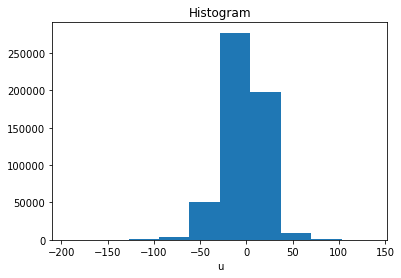

In [18]:
df_dates = pd.read_csv('ssw_dates_displ_test.csv',parse_dates=['BeginDate'],index_col=['BeginDate'],sep=',') # you can load SSWs from a csv file like attached
print(df_dates.index)

xa_ls = []
max_lag=30
u_rio_ano_sel=[]

for il, lag in enumerate(range(-max_lag,max_lag+1)):
    #dates = df_dates.set_index('BeginDate')
    #dates_neu = pd.to_datetime(df_dates.index)
    #print(dates)
    
    dates_neu = df_dates.index.shift(lag,freq='D') # + pd.Timedelta(str(lag)+' days')
    dates_neu = dates_neu.strftime("%Y-%m-%d")
    print(dates_neu)
    for i in range(0,len(dates_neu)):
        u_rio_anomalie_sel = u_rio_anomalie.sel(time = dates_neu[i])
        print(u_rio_anomalie_sel)
        #u_rio_ano_sel = xr.merge([u_rio_ano_sel, u_rio_anomalie_sel], join="exact").append(u_rio_anomalie_sel)
        u_rio_ano_sel.append(u_rio_anomalie_sel)
    comp_0 = xr.concat(u_rio_ano_sel, dim = 'lag')
    comp = comp_0.groupby('time.month') #- clim
    comp_m = comp.mean('time')
    xa_ls.append(comp_m)
    xa_comp = xr.concat(xa_ls, dim = 'lag')
    print(xa_comp)
    #xa_comp['lag'] = range(-max_lag, max_lag+1)

xa_comp.plot()



In [ ]:
print(dates)

In [ ]:
u_rio_anomalie.sel(time = '2009-01-23 -30 days +00:00:00')

In [ ]:
print(xa_comp)